In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [2]:
from PIL import Image

In [3]:
import io
from PIL import Image
import ipywidgets as widgets
from IPython.display import Markdown, display

In [4]:
# !pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argcomplete==1.12.3
argon2-cffi==21.1.0
arviz==0.11.2
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.0.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cached-property==1.5.2
cachetools==4.2.2
catalogue==1.0.0
certifi==2021.5.30
cffi==1.14.6
cftime==1.5.0
chardet==3.0.4
charset-normalizer==2.0.4
clang==5.0
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda101==9.1.0
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.24
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill

In [ ]:
display(Markdown("****MNIST IMAGE CLASSIFICATION****"))

****MNIST IMAGE CLASSIFICATION****

In [ ]:
btn_image = widgets.FileUpload()
out_pl = widgets.Output()
out_pl.clear_output()
out_img = widgets.Output()
out_img.clear_output()

btn_run = widgets.Button(description="Detect")

In [ ]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [ ]:
model = torch.load('pytorch_nn.pt')
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Sequential(
  (layer_1): Linear(in_features=784, out_features=1024, bias=True)
  (layer_2): ReLU()
  (layer_3): Linear(in_features=1024, out_features=1024, bias=True)
  (layer_4): ReLU()
  (layer_5): Linear(in_features=1024, out_features=2048, bias=True)
  (layer_6): ReLU()
  (layer_7): Linear(in_features=2048, out_features=10, bias=True)
  (layer_8): Softmax(dim=None)
)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Predicted Digit = 8


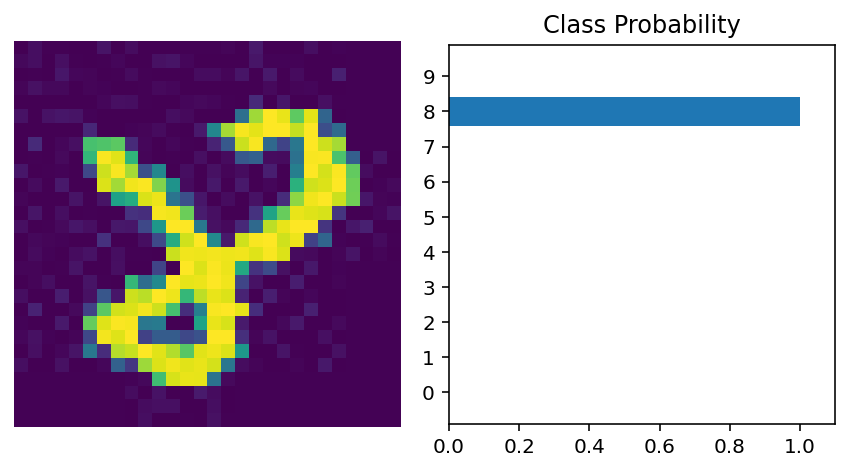

In [ ]:
# img = Image.open('/content/Val_Img_9_8.jpeg')
# img_tr = transform(img).view(1, 784)

# with torch.no_grad():
#     logps = model(img_tr.cuda())

# # Output of the network are log-probabilities, need to take exponential for probabilities
# ps = torch.exp(logps)
# probab = list(ps.cpu().numpy()[0])
# print("Predicted Digit =", probab.index(max(probab)))
# view_classify(img_tr.view(1, 28, 28), logps)

In [ ]:
def on_click_classify(path_to_image):
  model = torch.load('pytorch_nn.pt')
  model.eval()

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)

  img = btn_image.data[-1] # bytes code
  img = Image.open(io.BytesIO(img))
  out_pl.clear_output()
  # img = Image.open('/content/Val_Img_7_2.jpeg')
  img_tr = transform(img).view(1, 784)

  with torch.no_grad():
      logps = model(img_tr.cuda())

  # Output of the network are log-probabilities, need to take exponential for probabilities
  ps = torch.exp(logps)
  probab = list(ps.cpu().numpy()[0])
  print("Predicted Digit =", probab.index(max(probab)))
  view_classify(img_tr.view(1, 28, 28), logps)

In [ ]:
def on_upload_display(change):
    img = btn_image.data[-1] # bytes code
    img = Image.open(io.BytesIO(img))
    out_pl.clear_output()
    with out_pl:
        display(img)

In [ ]:
btn_run.on_click(on_click_classify)
instruction_labl = widgets.Label("Upload your image")
Run_labl = widgets.Label("Click on Detect for Prediction")
input_widgets = widgets.VBox([instruction_labl, btn_image,Run_labl, widgets.HBox([btn_run])])
output_widgets = widgets.HBox([out_pl, out_img])